# Project on - 1D- BANKING/CREDIT RISK/DEFAULT OF CREDIT CARD CLIENTS

In [ ]:
#Problem Statement
#Data Link : https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

                

#file_path= C:\Users\subha\OneDrive\Desktop\Goal\ML-REVISION\PYTHON-ML ASSIGNMENT\archive\UCI_Credit_Card.csv

CREDIT_CARD_LOANS= pd.read_csv(r'C:\Users\subha\OneDrive\Desktop\Goal\ML-REVISION\PYTHON-ML ASSIGNMENT\archive\UCI_Credit_Card.csv')
CREDIT_CARD_LOANS

In [ ]:
#Step by Step Procedure
#1.I have downloaded the data from keggale instaed uploading & creating link
#2.then i have imported the file. the file is csv.
#3.Noted down the Objective of this Model.
#4.Explored the metadata.

# Objective & Background of Project-1D

In [ ]:
#Dataset Information
#This dataset contains information on 
#1.default payments, 
#2.demographic factors, 
#3.credit data, 
#4.history of payment, 
#5.and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
#6. Dataset for 6 months

#Our Goal is to avoid Risk as under:
#1.Risk associated before sanction of Credit card
#2.Risk  after sanction of credit card
#3.Throwing various periodical alerts Monitoring dept to initiate the follow ups/ monitorings well in advance to arrest any loss/
#turning loan bad.

# STEP-1 MetaData  Analysis

In [3]:
#Creating a duplicate dataset from original dataset for my workings to keep the original file as it is.
CREDIT_CARD_LOANS1= CREDIT_CARD_LOANS.copy()

In [ ]:
CREDIT_CARD_LOANS1

In [4]:
CREDIT_CARD_LOANS1.shape

#Observations:
#As shared by the data team, there are 25 variables. Output is also giving 25 outputs.

(30000, 25)

In [ ]:
CREDIT_CARD_LOANS1.info

#.info & .describe gives the similar information.

In [ ]:
CREDIT_CARD_LOANS1.describe

In [ ]:
CREDIT_CARD_LOANS1.dtypes

# VARIABLE	DTYPE	TYPE	MIN	MAX	REMARKS
ID	int64	Discrete			Unique ID for all
LIMIT_BAL	float64	Contineous	0	1	0-no limit/1=max san limit
SEX	int64	categorical	1-male	2-female	
EDUCATION	int64	Discrete	1	6	
MARRIAGE	int64	categorical	1	3	
AGE	int64	Discrete	18	90	Since loan-as per stad-18
PAY_0	int64	Discrete	-1	9	Sep-05
PAY_2	int64	Discrete	-1	9	Aug-05
PAY_3	int64	Discrete	-1	9	Jul-05
PAY_4	int64	Discrete	-1	9	Jun-05
PAY_5	int64	Discrete	-1	9	May-05
PAY_6	int64	Discrete	-1	9	Apr-05
BILL_AMT1	float64	Contineous	0	1	Sep-05
BILL_AMT2	float64	Contineous	0	1	Aug-05
BILL_AMT3	float64	Contineous	0	1	Jul-05
BILL_AMT4	float64	Contineous	0	1	Jun-05
BILL_AMT5	float64	Contineous	0	1	May-05
BILL_AMT6	float64	Contineous	0	1	Apr-05
PAY_AMT1	float64	Contineous	0	1	Sep-05
PAY_AMT2	float64	Contineous	0	1	Aug-05
PAY_AMT3	float64	Contineous	0	1	Jul-05
PAY_AMT4	float64	Contineous	0	1	Jun-05
PAY_AMT5	float64	Contineous	0	1	May-05
PAY_AMT6	float64	Contineous	0	1	Apr-05
default.payment.next.month	int64	Discrete	0	1	YES=1,NO=0
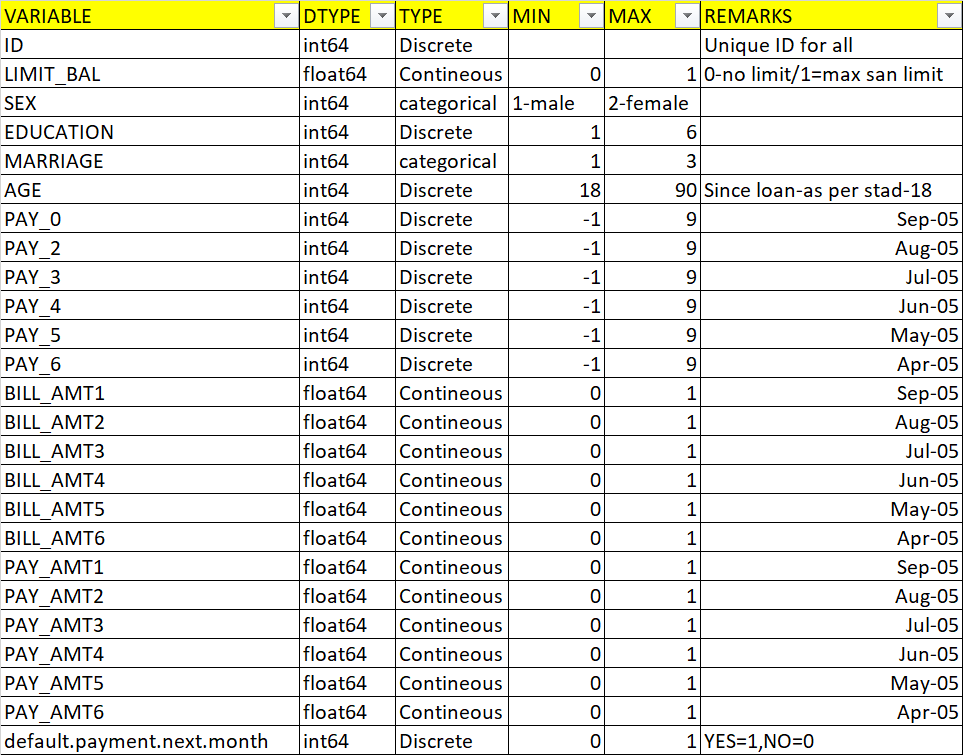

In [ ]:
#Observations/References
#Education- since can be ordered on gradewise, i hv taken as discrete.
#Bill_amt may be excess then sanction limit with penal interest. but cal purpose, i hv taken 1=sanctionlimit.

In [ ]:
CREDIT_CARD_LOANS1.head(15)

#Observations:
#From below table, almost it looks that dataset is in order, we have to do the individual variable exploration.

CREDIT_CARD_LOANS1.isnull()

CREDIT_CARD_LOANS1.isnull().sum()
#Observations:
#There is no missing value.

# Variable-1- ID

CREDIT_CARD_LOANS1['ID'].duplicated()
#Observations-All IDs are unique.

In [ ]:
CREDIT_CARD_LOANS1.columns.values

# Variable-2-LIMIT_BAL- Contineous

In [ ]:
plt.boxplot(CREDIT_CARD_LOANS1['LIMIT_BAL'])
#Observations
#The box plot is compressed in one end.

In [8]:
CREDIT_CARD_LOANS1['LIMIT_BAL'].isnull().sum()
#Observations
#There is no missing limit bal values. Valid observations. 
#relevance of Imp of boxplot & percentile in this variable?

0

LIMIT_BAL_PERCENTILES= CREDIT_CARD_LOANS1["LIMIT_BAL"].quantile ([0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
LIMIT_BAL_PERCENTILES

In [19]:
sum (CREDIT_CARD_LOANS1['LIMIT_BAL']> 500000)

#OBSERVATIONS
#1.Only 1% ia having beyond 5 lakhs limit. the no of customer is 206.

206

In [11]:
sum (CREDIT_CARD_LOANS1['LIMIT_BAL'] > 999999)
#Only one customer is having 10 lakhs limit bal.
#>5 lakhs- there are 206 no of customers.
#Only 1 customerout of 300000 is having limit of Rs 10 lakh.

1

# Variable-3-SEX-Categorical

In [ ]:
CREDIT_CARD_LOANS1['SEX'].value_counts()
sns.countplot (y='SEX', data =CREDIT_CARD_LOANS1)

In [53]:
CREDIT_CARD_LOANS1['SEX'].value_counts()
#OBSERVATIONS:
#Data is correct- 1&2 only available as per dataset as well.

2    18112
1    11888
Name: SEX, dtype: int64

# Variable-4-EDUCATION- CATEGORICAL

In [ ]:
CREDIT_CARD_LOANS1['EDUCATION'].value_counts()

In [ ]:
CREDIT_CARD_LOANS1['EDUCATION'].value_counts()
sns.countplot (y='EDUCATION', data =CREDIT_CARD_LOANS1)
#OBSERVATIONS
#Data is wrong. there is no category for zero. there are 14 customers, we need to do the treatment.

CREDIT_CARD_LOANS1['EDUCATION'].value_counts()

# Treatment for Variable-4 EDUCATION- 14 BORROWER WITH 0 CODE

In [13]:
#Imputation with Target Variable
cross_tab_Education= pd.crosstab(CREDIT_CARD_LOANS1['EDUCATION'],CREDIT_CARD_LOANS1['default.payment.next.month'])
cross_tab_Education

#Input
#EDCATION- DISCRETE, Min 1 & Max6.
#14 /30000=0.05% (OUTLIER LESS THAN 10%)- IMPUTATION- MEDIAN

default.payment.next.month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [14]:
cross_tab_Education_percent=cross_tab_Education.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_Education_percent,2)

#Observations:
#we got 1% & 0% approx to 4 category & 5 th cate. Since we have 4th as "Other" & 5th as "Unknown", i prefer to put under 4th category.
    

default.payment.next.month,0,1
EDUCATION,,
0,1.00,0.00
1,0.81,0.19
2,0.76,0.24
3,0.75,0.25
4,0.94,0.06
5,0.94,0.06
6,0.84,0.16


In [21]:
CREDIT_CARD_LOANS1['EDUCATION_New']=CREDIT_CARD_LOANS1['EDUCATION']
CREDIT_CARD_LOANS1['EDUCATION_New'][CREDIT_CARD_LOANS1['EDUCATION'] < 1]=4
CREDIT_CARD_LOANS1['EDUCATION_New']

CREDIT_CARD_LOANS1['EDUCATION_New'].value_counts()

C:\Users\subha\AppData\Local\Temp\ipykernel_21456\3128806100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CREDIT_CARD_LOANS1['EDUCATION_New'][CREDIT_CARD_LOANS1['EDUCATION'] < 1]=4


2    14030
1    10585
3     4917
5      280
4      137
6       51
Name: EDUCATION_New, dtype: int64

# variable -5- Marriage- Categorical- Min 1 Max 3

In [ ]:
CREDIT_CARD_LOANS1['MARRIAGE'].value_counts()
sns.countplot(y='MARRIAGE', data=CREDIT_CARD_LOANS1)

#Observations: We have only 3 categories under marriage, 1 to 3. however, 0 is not there. so we will do the treatment.

In [7]:
CREDIT_CARD_LOANS1['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [9]:
import pandas as pd


# Treatment to categorical variable- MARRIAGE- ON CROSS TAB Basis

In [22]:
cross_tab_Marriage= pd.crosstab(CREDIT_CARD_LOANS1['MARRIAGE'],CREDIT_CARD_LOANS1['default.payment.next.month'])
cross_tab_Marriage

#Observations:
#54 customer  to total 30000 customer- is less than 0.2%.

default.payment.next.month,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


In [24]:
cross_tab_Marriage_percent = cross_tab_Marriage.apply (lambda x: x/x.sum(), axis=1)
round(cross_tab_Marriage_percent,2)

default.payment.next.month,0,1
MARRIAGE,,
0,0.91,0.09
1,0.77,0.23
2,0.79,0.21
3,0.74,0.26


In [26]:
#54 no of csutomer is only <0.2%, we are replacing with 2 which is having 79% to 21% as 91 % is not matching with anyone.
#Percentage 91% not matching to any % . Since the highest is 
#Replacing error values with 2

CREDIT_CARD_LOANS1['MARRIAGE_New']=CREDIT_CARD_LOANS1['MARRIAGE']
CREDIT_CARD_LOANS1['MARRIAGE_New'][CREDIT_CARD_LOANS1['MARRIAGE'] < 1]=2
CREDIT_CARD_LOANS1['MARRIAGE_New']

CREDIT_CARD_LOANS1['MARRIAGE_New'].value_counts()



C:\Users\subha\AppData\Local\Temp\ipykernel_21456\4168319227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CREDIT_CARD_LOANS1['MARRIAGE_New'][CREDIT_CARD_LOANS1['MARRIAGE'] < 1]=2


2    16018
1    13659
3      323
Name: MARRIAGE_New, dtype: int64

In [25]:
CREDIT_CARD_LOANS1.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month', 'MARRIAGE_New'],
      dtype=object)

# Variable- 6- AGE- DISCRETE in this scenario- Min 18 Max 90

<AxesSubplot:xlabel='count', ylabel='AGE'>

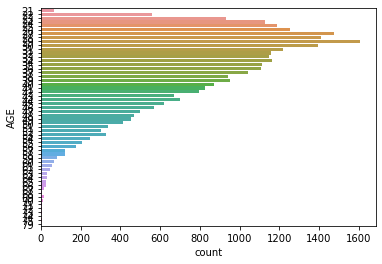

In [15]:
CREDIT_CARD_LOANS1['AGE'].value_counts()
sns.countplot(y='AGE', data=CREDIT_CARD_LOANS1)

In [26]:
CREDIT_CARD_LOANS1['AGE'].value_counts()
#Observations:
#Min age- 21
#Max age- 74
#this is within our Min & Max range, data is correct.

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

# Variable- 7- PAY_0- DISCRETE MIN -1 & MAX 9

<AxesSubplot:xlabel='count', ylabel='PAY_0'>

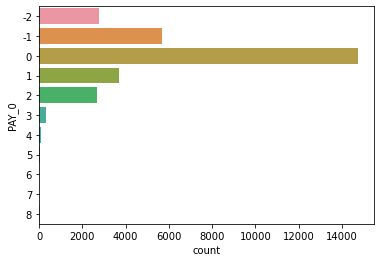

In [31]:
CREDIT_CARD_LOANS1['PAY_0'].value_counts()
sns.countplot(y='PAY_0', data=CREDIT_CARD_LOANS1)

In [ ]:
CREDIT_CARD_LOANS1['PAY_0'].value_counts()
#Observations:
#all the pay are having 0 & -2.
#since -1 is documented & taken as duly paid on time,
# 0 & -2 also can be treated as one category.
#Now, we hv to replace the value of 0 & -2 with -1.
    

# Treatment to Variable - PAY_0

In [17]:
CREDIT_CARD_LOANS1['PAY_0_New'] = CREDIT_CARD_LOANS1['PAY_0']
CREDIT_CARD_LOANS1['PAY_0_New'][CREDIT_CARD_LOANS1['PAY_0'] <= 0] = -1
CREDIT_CARD_LOANS1['PAY_0_New']

C:\Users\subha\AppData\Local\Temp\ipykernel_11384\699911713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CREDIT_CARD_LOANS1['PAY_0_New'][CREDIT_CARD_LOANS1['PAY_0'] <= 0] = -1


0        2
1       -1
2       -1
3       -1
4       -1
        ..
29995   -1
29996   -1
29997    4
29998    1
29999   -1
Name: PAY_0_New, Length: 30000, dtype: int64

In [18]:
CREDIT_CARD_LOANS1['PAY_0_New'].value_counts()

-1    23182
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0_New, dtype: int64

# Variable- 8- PAY_2 - DISCRETE MIN -1 & MAX 9

In [ ]:
CREDIT_CARD_LOANS1['PAY_2'].value_counts()

# TREATMENT TO - VAR-8- PAY_0

In [ ]:
CREDIT_CARD_LOANS1['PAY_2_New'] = CREDIT_CARD_LOANS1['PAY_2']
CREDIT_CARD_LOANS1['PAY_2_New'][CREDIT_CARD_LOANS1['PAY_2'] <= 0] = -1
CREDIT_CARD_LOANS1['PAY_2_New']

In [ ]:
CREDIT_CARD_LOANS1['PAY_2_New'].value_counts()

# Variable- 9- PAY_3 - DISCRETE MIN -1 & MAX 9

In [ ]:
CREDIT_CARD_LOANS1['PAY_3'].value_counts()

# TREATMENT TO VAR- 9- PAY_3

In [ ]:
CREDIT_CARD_LOANS1['PAY_3_New'] = CREDIT_CARD_LOANS1['PAY_2']
CREDIT_CARD_LOANS1['PAY_3_New'][CREDIT_CARD_LOANS1['PAY_2'] <= 0] = -1
CREDIT_CARD_LOANS1['PAY_3_New']

In [ ]:
CREDIT_CARD_LOANS1['PAY_3_New'].value_counts()

# Variable- 10- PAY_4 - DISCRETE MIN -1 & MAX 9

In [ ]:
CREDIT_CARD_LOANS1['PAY_4'].value_counts()
sns.countplot(y='PAY_4',  data=CREDIT_CARD_LOANS1)

In [ ]:
CREDIT_CARD_LOANS1['PAY_4'].value_counts()

# TREATMENT TO VAR- 10- PAY_4

In [ ]:
CREDIT_CARD_LOANS1['PAY_4_New']= CREDIT_CARD_LOANS1['PAY_4']
CREDIT_CARD_LOANS1['PAY_4_New'][CREDIT_CARD_LOANS1['PAY_4']<=0]=-1
CREDIT_CARD_LOANS1['PAY_4_New']

In [ ]:
CREDIT_CARD_LOANS1['PAY_4_New'].value_counts()

# Variable- 11- PAY_5 - DISCRETE MIN -1 & MAX 9

In [ ]:
CREDIT_CARD_LOANS1['PAY_5'].value_counts()
sns.countplot(y='PAY_5',  data=CREDIT_CARD_LOANS1)

In [ ]:
CREDIT_CARD_LOANS1['PAY_5'].value_counts()

# TREATMENT TO VAR- 11- PAY_5

In [ ]:
CREDIT_CARD_LOANS1['PAY_5_New']= CREDIT_CARD_LOANS1['PAY_5']
CREDIT_CARD_LOANS1['PAY_5_New'][CREDIT_CARD_LOANS1['PAY_5']<=0]=-1
CREDIT_CARD_LOANS1['PAY_5_New']

In [ ]:
CREDIT_CARD_LOANS1['PAY_5_New'].value_counts()


# Variable- 11- PAY_6 - DISCRETE MIN -1 & MAX 9

In [ ]:
CREDIT_CARD_LOANS1['PAY_6'].value_counts()
sns.countplot(y='PAY_6',  data=CREDIT_CARD_LOANS1)

# TREATMENT TO VAR- 11- PAY_5

In [ ]:
CREDIT_CARD_LOANS1['PAY_6_New']= CREDIT_CARD_LOANS1['PAY_6']
CREDIT_CARD_LOANS1['PAY_6_New'][CREDIT_CARD_LOANS1['PAY_6']<=0]=-1
CREDIT_CARD_LOANS1['PAY_6_New']

In [ ]:
CREDIT_CARD_LOANS1['PAY_6_New'].value_counts()

# Variable- 25- default.next.month- DISCRETE MIN 0 & MAX 1

In [59]:
CREDIT_CARD_LOANS1['default.payment.next.month'].value_counts()

#Observations- data is correct. can be taken directly for analysis.


0    23364
1     6636
Name: default.payment.next.month, dtype: int64

# Variable- 12- BILL-AMT_1 - CONTINEOUS MIN 0 & MAX 1

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe78927af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe7892e190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe78927820>],
 'medians': [<matplotlib.lines.Line2D at 0x1fe7892e670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fe7892e940>],
 'means': []}

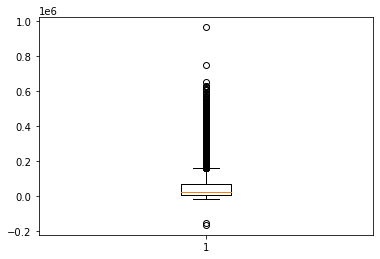

In [7]:
CREDIT_CARD_LOANS1['BILL_AMT1'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(CREDIT_CARD_LOANS['BILL_AMT1'])


(array([2.0000e+00, 2.1885e+04, 6.0070e+03, 1.5340e+03, 3.9700e+02,
        1.4300e+02, 2.7000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-165580. ,  -52570.9,   60438.2,  173447.3,  286456.4,  399465.5,
         512474.6,  625483.7,  738492.8,  851501.9,  964511. ]),
 <BarContainer object of 10 artists>)

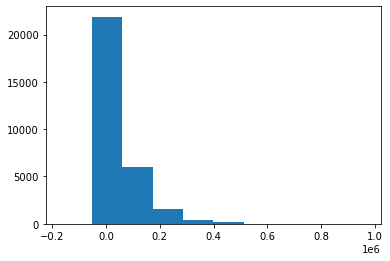

In [20]:
plt.hist (CREDIT_CARD_LOANS1['BILL_AMT1'])

In [22]:
sum(CREDIT_CARD_LOANS1['BILL_AMT1']<0)

590

(array([1.8123e+04, 9.0400e+03, 2.0380e+03, 5.3400e+02, 1.9000e+02,
        6.2000e+01, 1.0000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-69777. ,  35593.8, 140964.6, 246335.4, 351706.2, 457077. ,
        562447.8, 667818.6, 773189.4, 878560.2, 983931. ]),
 <BarContainer object of 10 artists>)

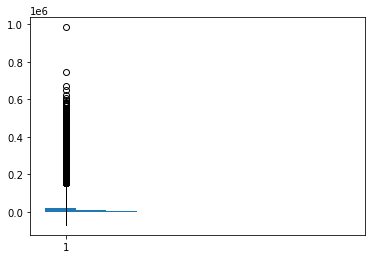

In [6]:
CREDIT_CARD_LOANS1['BILL_AMT2'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.boxplot(CREDIT_CARD_LOANS1['BILL_AMT2'])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.hist(CREDIT_CARD_LOANS1['BILL_AMT2'])


(array([1.8123e+04, 9.0400e+03, 2.0380e+03, 5.3400e+02, 1.9000e+02,
        6.2000e+01, 1.0000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-69777. ,  35593.8, 140964.6, 246335.4, 351706.2, 457077. ,
        562447.8, 667818.6, 773189.4, 878560.2, 983931. ]),
 <BarContainer object of 10 artists>)

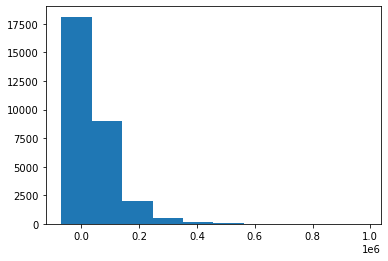

In [7]:
plt.hist(CREDIT_CARD_LOANS1['BILL_AMT2'])

In [23]:
sum(CREDIT_CARD_LOANS1['BILL_AMT2']<0)

669

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa489bfc10>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa489ce1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa489bf940>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa489ce790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa489cea60>],
 'means': []}

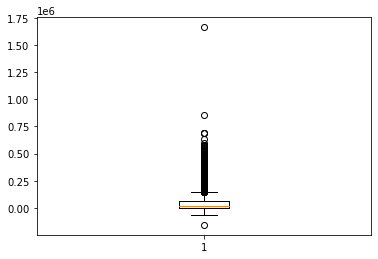

In [79]:
CREDIT_CARD_LOANS1['BILL_AMT3'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

plt.boxplot(CREDIT_CARD_LOANS1['BILL_AMT3'])

In [9]:
sum (CREDIT_CARD_LOANS['BILL_AMT3'] < 0)

655

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa48a300a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa48a30640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa48a21d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa48a30be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa48a30eb0>],
 'means': []}

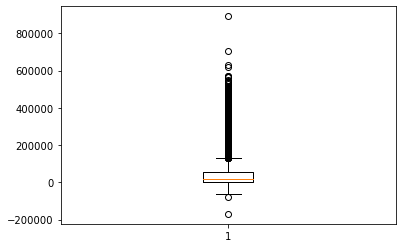

In [80]:
CREDIT_CARD_LOANS1['BILL_AMT4'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

plt.boxplot(CREDIT_CARD_LOANS1['BILL_AMT4'])

In [10]:
sum (CREDIT_CARD_LOANS1['BILL_AMT4']<0)

675

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa48a85b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa48a95130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa48a85850>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa48a956d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa48a959a0>],
 'means': []}

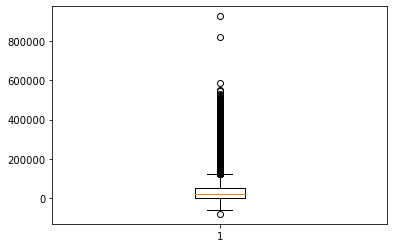

In [81]:
CREDIT_CARD_LOANS1['BILL_AMT5'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

plt.boxplot(CREDIT_CARD_LOANS1['BILL_AMT5'])

In [11]:
sum (CREDIT_CARD_LOANS['BILL_AMT5']<0)

655

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa48adef40>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa48aed520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa48adec70>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa48aedac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa48aedd90>],
 'means': []}

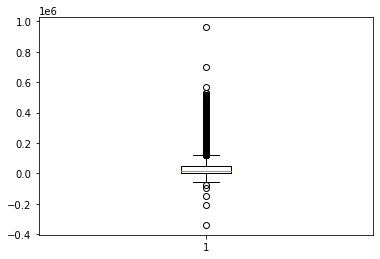

In [82]:
CREDIT_CARD_LOANS1['BILL_AMT6'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.boxplot(CREDIT_CARD_LOANS1['BILL_AMT6'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa48b4ba30>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa48b4bfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa48b4b730>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa48b5a5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa48b5a880>],
 'means': []}

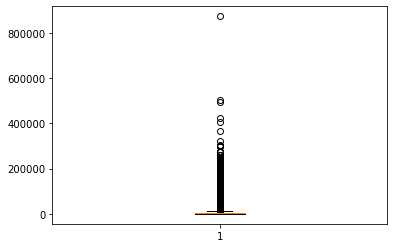

In [83]:
CREDIT_CARD_LOANS1['PAY_AMT1'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(CREDIT_CARD_LOANS['PAY_AMT1'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa48ba8d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa49b86340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa48ba8a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa49b868e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa49b86bb0>],
 'means': []}

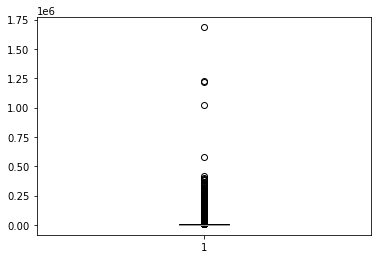

In [84]:
CREDIT_CARD_LOANS1['PAY_AMT2'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.boxplot(CREDIT_CARD_LOANS1['PAY_AMT2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa49be65b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa49be6b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa49be62b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa49bf4130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa49bf4400>],
 'means': []}

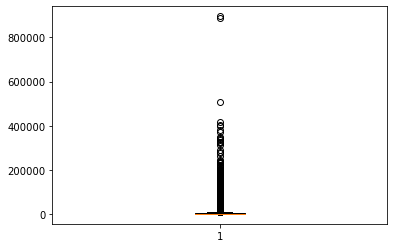

In [85]:
CREDIT_CARD_LOANS1['PAY_AMT3'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.boxplot(CREDIT_CARD_LOANS1['PAY_AMT3'])

In [30]:
CREDIT_CARD_LOANS1['PAY_AMT2'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.10          0.00
0.20        268.80
0.30       1165.00
0.50       2009.00
0.70       4045.30
0.80       6000.00
0.90      10401.10
0.91      11320.00
0.92      12536.16
0.93      14131.26
0.94      16000.00
0.95      19004.35
0.96      21408.36
0.97      29000.00
0.98      41027.88
0.99      76651.02
1.00    1684259.00
Name: PAY_AMT2, dtype: float64

In [33]:
sum (CREDIT_CARD_LOANS1['PAY_AMT2']>80000)
sum (CREDIT_CARD_LOANS1['PAY_AMT2']>999999)
sum (CREDIT_CARD_LOANS1['PAY_AMT2']>1000000)


#Observations:
#THERE ARE 282 NO OF CUSTOMERS PAYING MORE THAN 80000.
#THERE ARE 4 NO OF CUSTOMERS PAYING MORE THAN 999999.
#99% are paying upto 80000. only 1% is paying 1684259.We have seen on limit bal that there is only one 
#customer with bal o/s 10 LAKHS as sanction limit. If 3 additional customers otherthan (10lakhs customer) 
#have paid more than 10 lakhs means, these 3 are hardcore defaulters.

4

In [ ]:
CREDIT_CARD_LOANS1['PAY_AMT3'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

In [ ]:
CREDIT_CARD_LOANS1['PAY_AMT3'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

In [ ]:
CREDIT_CARD_LOANS1['PAY_AMT4'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.boxplot(CREDIT_CARD_LOANS1['PAY_AMT4'])

In [ ]:
CREDIT_CARD_LOANS1['PAY_AMT4'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

In [ ]:
CREDIT_CARD_LOANS1['PAY_AMT5'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.boxplot(CREDIT_CARD_LOANS1['PAY_AMT5'])

In [ ]:
CREDIT_CARD_LOANS1['PAY_AMT5'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

In [ ]:
CREDIT_CARD_LOANS1['PAY_AMT6'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])
plt.boxplot(CREDIT_CARD_LOANS1['PAY_AMT6'])

In [ ]:
CREDIT_CARD_LOANS1['PAY_AMT6'].quantile([0.10,0.20,0.30,0.50,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

# MODEL BUILDING

In [27]:
import pandas as pd
import numpy as np
import matplotlib as matplot
import statsmodels

In [49]:
CREDIT_CARD_LOANS1.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month', 'EDUCATION_New',
       'MARRIAGE_New', 'default_payment'], dtype=object)

In [28]:
#1.Find out the correlation between 'SEX' & 'default rate'

#Find the correlation between number of passengers and promotional budget.

CREDIT_CARD_LOANS1['default_payment']= CREDIT_CARD_LOANS1['default.payment.next.month']
np.corrcoef(CREDIT_CARD_LOANS1.AGE,CREDIT_CARD_LOANS1.default_payment)

#OBSERVATIONS:
#1.since we will use dataframe.variable (here, variablr itself has 3 dots so, i hv renamed.)Therafter it worked fine.

array([[1.        , 0.01388983],
       [0.01388983, 1.        ]])

In [12]:
import statsmodels.formula.api as sm

In [29]:
model= sm.ols( formula= 'AGE ~ default_payment', data= CREDIT_CARD_LOANS1)


In [30]:
fitted1 = model.fit()
print(fitted1.summary())

#Observations:
# Interesting findings is R- Sqaured & Adj-R Squared - both are 0.00. Meaning to be looked into.

                            OLS Regression Results                            
Dep. Variable:                    AGE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.789
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0161
Time:                        23:05:32   Log-Likelihood:            -1.0920e+05
No. Observations:               30000   AIC:                         2.184e+05
Df Residuals:                   29998   BIC:                         2.184e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.4173      0.060    5

In [31]:
import statsmodels.formula.api as sm

In [32]:
model1= sm.ols(formula= 'SEX ~ default_payment', data=CREDIT_CARD_LOANS1 )

In [64]:
fitted2= model1.fit()
print(fitted2.summary())

#Observations:
#Logistic regression to be done- as Default- YES/NO
#We use Linear regression in case of contineous .But for ,y purpose, i hv used linear regr hereas well.
#Further, regresson to be applied to discret or contineous variable not for categorical.
#Since python by default dosent discard the categorical variables or Correct regression model, 
#it has worked out and given some result.

                            OLS Regression Results                            
Dep. Variable:                    SEX   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     47.98
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           4.40e-12
Time:                        22:33:30   Log-Likelihood:                -21090.
No. Observations:               30000   AIC:                         4.218e+04
Df Residuals:                   29998   BIC:                         4.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6141      0.003    5

In [33]:
import statsmodels.formula.api as sm

In [34]:
model3= sm.ols(formula='ID ~ default_payment', data= CREDIT_CARD_LOANS1)

In [70]:
np.corrcoef(CREDIT_CARD_LOANS1.ID,CREDIT_CARD_LOANS1.default_payment)

array([[ 1.        , -0.01395195],
       [-0.01395195,  1.        ]])

In [35]:
fitted4= model3.fit()

In [36]:
print(fitted4.summary())

                            OLS Regression Results                            
Dep. Variable:                     ID   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.840
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0157
Time:                        23:06:00   Log-Likelihood:            -3.1456e+05
No. Observations:               30000   AIC:                         6.291e+05
Df Residuals:                   29998   BIC:                         6.291e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.506e+04     56.654    2

In [ ]:
#Observations:
#Since in our project, we need "logistic regression",i m stopping linear regression.In all above case, 
#i m getting 0 in all R square value.

In [37]:
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(CREDIT_CARD_LOANS1[['AGE']],CREDIT_CARD_LOANS1[['default_payment']])


LinearRegression()

In [38]:
print ('intercept', lr.intercept_)
print ('coefficient', lr.coef_)

intercept [0.19900636]
coefficient [[0.00062543]]


In [39]:
#If Age is 21 (Minimum age) then will that customer pay the credit card?
d1= pd.DataFrame ({'AGE':[21]})
predict1= lr.predict (d1)
print (predict1)


[[0.21214036]]


In [40]:
#If Age is 79 then will that customer pay the credit card?
d2= pd.DataFrame({'AGE':[79]})
predict2= lr.predict (d2)
print(predict2)



[[0.24841521]]


# Drawing Linear Regression line

In [41]:
new_data= CREDIT_CARD_LOANS1.drop (['default_payment'], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column 

new_data['pred_values']= lr.predict (new_data)
new_data['Actual']= CREDIT_CARD_LOANS1["default_payment"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["AGE"], new_data["Actual"])
plt.plot(new_data["AGE"], new_data["pred_values"], color='green')
#Add lables and title 
plt.title('Predicted vs Actual Plot')
plt.xlabel('AGE')
plt.ylabel('default_payment')
plt.show()

C:\Users\subha\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BILL_AMT1
- BILL_AMT2
- BILL_AMT3
- BILL_AMT4
- BILL_AMT5
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 25 features, but LinearRegression is expecting 1 features as input.

# Logistic Regression

In [43]:
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [11]:
CREDIT_CARD_LOANS1.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month', 'default_payment'],
      dtype=object)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logistic=LogisticRegression()


In [46]:
logistic.fit(CREDIT_CARD_LOANS1[["AGE"]],CREDIT_CARD_LOANS1["default_payment"])

LogisticRegression()

In [47]:
logistic.fit(CREDIT_CARD_LOANS1[["LIMIT_BAL"]],CREDIT_CARD_LOANS1["default_payment"])

LogisticRegression()

In [48]:
logistic.fit(CREDIT_CARD_LOANS1[["PAY_0"]],CREDIT_CARD_LOANS1["default_payment"])

LogisticRegression()

In [49]:
logistic.fit(CREDIT_CARD_LOANS1[["BILL_AMT1"]],CREDIT_CARD_LOANS1["default_payment"])

LogisticRegression()

In [47]:
new_data= CREDIT_CARD_LOANS1.drop (["default_payment"], axis=1)

In [ ]:
#Pass the variables to get the predicted values. Add actual values in a new column 

In [12]:
CREDIT_CARD_LOANS1.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month', 'default_payment'],
      dtype=object)

In [48]:
model= LogisticRegression()
model.fit(CREDIT_CARD_LOANS1[["ID"]+['LIMIT_BAL']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT1']+
                                 ['BILL_AMT2']+['BILL_AMT3']+['BILL_AMT4']+['BILL_AMT5']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                                 ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']],CREDIT_CARD_LOANS1[['default_payment']])


C:\Users\subha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\subha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
print("Intercepet",model.intercept_)
print("Coefficent",model.coef_)

Intercepet [-3.80971436e-08]
Coefficent [[-2.63951732e-05 -3.92571307e-06 -1.04148926e-06  1.92891472e-07
   1.52143613e-07  1.32302862e-07  1.22426116e-07  1.10370003e-07
   1.01780807e-07 -9.47811202e-06  5.10891751e-06  2.02539358e-06
   3.01401601e-06  1.71407736e-06  2.06816526e-06 -3.22535897e-05
  -2.17441205e-05 -8.74205362e-06 -8.39677133e-06 -6.24600045e-06
  -1.80623990e-06]]


# Drawing Logistic Regression line

new_data= CREDIT_CARD_LOANS1.drop(["default_payment"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column 
new_data["pred_values"]= model.predict_proba(new_data)[:,1]
new_data["Actual"]= CREDIT_CARD_LOANS1["default_payment"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["AGE"], new_data["Actual"])
plt.plot(new_data["AGE"], new_data["pred_values"], color='green')
#Add lables and title 
plt.title('Predicted vs Actual Plot')
plt.xlabel('AGE')
plt.ylabel('default_payment')
plt.show()

# Confusion Matrix & Accuracy

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [20]:
CREDIT_CARD_LOANS1.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month', 'default_payment'],
      dtype=object)

In [52]:
predict1=model.predict(CREDIT_CARD_LOANS1[["ID"]+['LIMIT_BAL']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT1']+
                                 ['BILL_AMT2']+['BILL_AMT3']+['BILL_AMT4']+['BILL_AMT5']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                                 ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])
predict1

cm1=confusion_matrix(CREDIT_CARD_LOANS1[['default_payment']],predict1)
print(cm1)

#Observations
#there are 30000 data sets .So we will get 30000 combinations of [0,0] [0,1] [1,1] [1,0]

[[23362     2]
 [ 6635     1]]


In [53]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)

col sums [29997     3]
Total 30000


In [54]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1 
accuracy1

0.7787666666666667

# MULTICOLLINEARITY

In [10]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [35]:
vif_cal(input_data=CREDIT_CARD_LOANS1, dependent_col="default_payment")

#Observations
#There are 6 X features having vif => 5.
#We have to drop one by one & see the impact.vif 
#we sd start dropping from the feature having highest v#if like BILL_AMT2 THEN BILL_AMT5 THEN BLL_AMT3 THEN BILL_AMT4 then 
#see what is impact is coming on BILL_AMT1 & BILL_AMT6.  

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  2.0
PAY_2  VIF =  3.18
PAY_3  VIF =  3.66
PAY_4  VIF =  4.29
PAY_5  VIF =  4.73
PAY_6  VIF =  3.26
BILL_AMT1  VIF =  14.05
BILL_AMT2  VIF =  25.87
BILL_AMT3  VIF =  21.78
BILL_AMT4  VIF =  20.45
BILL_AMT5  VIF =  25.06
BILL_AMT6  VIF =  15.03
PAY_AMT1  VIF =  1.71
PAY_AMT2  VIF =  2.24
PAY_AMT3  VIF =  1.76
PAY_AMT4  VIF =  1.65
PAY_AMT5  VIF =  1.69
PAY_AMT6  VIF =  1.17
default.payment.next.month  VIF =  1.14


In [36]:
vif_cal(input_data=CREDIT_CARD_LOANS1.drop("BILL_AMT1",axis=1),dependent_col="default_payment")
#Since, features BILL_AMT1 TO BILL_AMT6 has high vif values. So i sd start dropping one by one .

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.55
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  2.0
PAY_2  VIF =  3.16
PAY_3  VIF =  3.65
PAY_4  VIF =  4.29
PAY_5  VIF =  4.73
PAY_6  VIF =  3.26
BILL_AMT2  VIF =  12.44
BILL_AMT3  VIF =  21.78
BILL_AMT4  VIF =  20.44
BILL_AMT5  VIF =  25.06
BILL_AMT6  VIF =  15.01
PAY_AMT1  VIF =  1.34
PAY_AMT2  VIF =  2.23
PAY_AMT3  VIF =  1.75
PAY_AMT4  VIF =  1.64
PAY_AMT5  VIF =  1.68
PAY_AMT6  VIF =  1.17
default.payment.next.month  VIF =  1.14


In [37]:
vif_cal(input_data=CREDIT_CARD_LOANS1.drop(["BILL_AMT2"],axis=1),dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  2.0
PAY_2  VIF =  3.18
PAY_3  VIF =  3.65
PAY_4  VIF =  4.29
PAY_5  VIF =  4.73
PAY_6  VIF =  3.26
BILL_AMT1  VIF =  6.75
BILL_AMT3  VIF =  16.55
BILL_AMT4  VIF =  20.45
BILL_AMT5  VIF =  25.06
BILL_AMT6  VIF =  14.98
PAY_AMT1  VIF =  1.25
PAY_AMT2  VIF =  1.79
PAY_AMT3  VIF =  1.75
PAY_AMT4  VIF =  1.65
PAY_AMT5  VIF =  1.68
PAY_AMT6  VIF =  1.17
default_payment  VIF =  1.14


In [19]:
vif_cal(input_data=CREDIT_CARD_LOANS1.drop(["BILL_AMT3"],axis=1),dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  2.0
PAY_2  VIF =  3.18
PAY_3  VIF =  3.66
PAY_4  VIF =  4.29
PAY_5  VIF =  4.73
PAY_6  VIF =  3.26
BILL_AMT1  VIF =  14.05
BILL_AMT2  VIF =  19.67
BILL_AMT4  VIF =  16.72
BILL_AMT5  VIF =  25.02
BILL_AMT6  VIF =  15.02
PAY_AMT1  VIF =  1.67
PAY_AMT2  VIF =  1.26
PAY_AMT3  VIF =  1.41
PAY_AMT4  VIF =  1.65
PAY_AMT5  VIF =  1.68
PAY_AMT6  VIF =  1.17
default_payment  VIF =  1.14


In [20]:
vif_cal(input_data=CREDIT_CARD_LOANS1.drop(["BILL_AMT4"],axis=1),dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  2.0
PAY_2  VIF =  3.18
PAY_3  VIF =  3.66
PAY_4  VIF =  4.29
PAY_5  VIF =  4.72
PAY_6  VIF =  3.25
BILL_AMT1  VIF =  14.04
BILL_AMT2  VIF =  25.87
BILL_AMT3  VIF =  17.8
BILL_AMT5  VIF =  19.27
BILL_AMT6  VIF =  15.02
PAY_AMT1  VIF =  1.71
PAY_AMT2  VIF =  2.19
PAY_AMT3  VIF =  1.38
PAY_AMT4  VIF =  1.37
PAY_AMT5  VIF =  1.69
PAY_AMT6  VIF =  1.17
default_payment  VIF =  1.14


In [21]:
vif_cal(input_data=CREDIT_CARD_LOANS1.drop(["BILL_AMT5"],axis=1),dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  2.0
PAY_2  VIF =  3.18
PAY_3  VIF =  3.66
PAY_4  VIF =  4.29
PAY_5  VIF =  4.73
PAY_6  VIF =  3.25
BILL_AMT1  VIF =  14.05
BILL_AMT2  VIF =  25.87
BILL_AMT3  VIF =  21.74
BILL_AMT4  VIF =  15.72
BILL_AMT6  VIF =  7.73
PAY_AMT1  VIF =  1.71
PAY_AMT2  VIF =  2.23
PAY_AMT3  VIF =  1.75
PAY_AMT4  VIF =  1.31
PAY_AMT5  VIF =  1.35
PAY_AMT6  VIF =  1.16
default_payment  VIF =  1.14


In [22]:
vif_cal(input_data=CREDIT_CARD_LOANS1.drop(["BILL_AMT6"],axis=1),dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  2.0
PAY_2  VIF =  3.18
PAY_3  VIF =  3.66
PAY_4  VIF =  4.29
PAY_5  VIF =  4.72
PAY_6  VIF =  3.24
BILL_AMT1  VIF =  14.03
BILL_AMT2  VIF =  25.79
BILL_AMT3  VIF =  21.77
BILL_AMT4  VIF =  20.45
BILL_AMT5  VIF =  12.89
PAY_AMT1  VIF =  1.7
PAY_AMT2  VIF =  2.24
PAY_AMT3  VIF =  1.76
PAY_AMT4  VIF =  1.63
PAY_AMT5  VIF =  1.12
PAY_AMT6  VIF =  1.12
default_payment  VIF =  1.14


In [24]:
vif_cal(input_data=CREDIT_CARD_LOANS1.drop(["BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5"],axis=1),dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.55
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  2.0
PAY_2  VIF =  3.17
PAY_3  VIF =  3.64
PAY_4  VIF =  4.28
PAY_5  VIF =  4.71
PAY_6  VIF =  3.25
BILL_AMT1  VIF =  3.14
BILL_AMT6  VIF =  3.59
PAY_AMT1  VIF =  1.21
PAY_AMT2  VIF =  1.18
PAY_AMT3  VIF =  1.21
PAY_AMT4  VIF =  1.17
PAY_AMT5  VIF =  1.2
PAY_AMT6  VIF =  1.14
default_payment  VIF =  1.14


# Individual Impact of Variables

In [36]:
#from vif factor we hv alredy dropped the features with vif = > 5. So, calculating individual impact of variables, 
#we sd only take the remaining features.

import statsmodels.api as sm
model1=sm.Logit(CREDIT_CARD_LOANS1['default.payment.next.month'],CREDIT_CARD_LOANS1[['LIMIT_BAL']+['AGE']+
        ['PAY_0']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
        ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])

model1.fit()
print(model1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.474792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.474792
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29985
Method:                                   MLE   Df Model:                           14
Date:                        Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1015
Time:                                21:58:20   Log-Likelihood:                -14244.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [59]:
vif_cal(input_data=CREDIT_CARD_LOANS1.drop(["PAY_4","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5"],axis=1),dependent_col="default.payment.next.month")

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.55
SEX  VIF =  1.02
EDUCATION  VIF =  1.13
MARRIAGE  VIF =  1.23
AGE  VIF =  1.28
PAY_0  VIF =  1.99
PAY_2  VIF =  3.17
PAY_3  VIF =  3.04
PAY_5  VIF =  3.65
PAY_6  VIF =  3.24
BILL_AMT1  VIF =  3.14
BILL_AMT6  VIF =  3.59
PAY_AMT1  VIF =  1.21
PAY_AMT2  VIF =  1.18
PAY_AMT3  VIF =  1.19
PAY_AMT4  VIF =  1.17
PAY_AMT5  VIF =  1.2
PAY_AMT6  VIF =  1.14
default_payment  VIF =  1.14


In [69]:
import statsmodels.api as sm
model2=sm.Logit(CREDIT_CARD_LOANS1['default.payment.next.month'],CREDIT_CARD_LOANS1[['LIMIT_BAL']+['AGE']+
        ['PAY_0']+['PAY_2']+['PAY_3']+['PAY_5']+['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
        ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']])

model2.fit()
print(model2.fit().summary())

#Observations:
#we hv checked the p value t find out whether feature is impact ful ot not impactful.
#we found that PAY_4 is having highest P value of 0.254.
#so we will drop PAY_4 & will calculate again model2 & check the p value.

Optimization terminated successfully.
         Current function value: 0.474814
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.474814
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29986
Method:                                   MLE   Df Model:                           13
Date:                        Mon, 05 Dec 2022   Pseudo R-squ.:                  0.1015
Time:                                22:28:01   Log-Likelihood:                -14244.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [66]:
# Wald Chi Square


In [ ]:
#Most influential Feature- 
#As per above table, we have taken square of 'Z' value and concluded that  following features are more powerful:
#1. AGE
#2-PAY-0 - 

# Decision Tree

In [43]:
#Convert Non-numerical Data into numerical is not required in 1D.

CREDIT_CARD_LOANS1.columns.values
CREDIT_CARD_LOANS1.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
default_payment                 int64
dtype: objec

# Decision Tree Model Building

In [17]:
from sklearn import tree

features= ['LIMIT_BAL', 'AGE','PAY_0', 'PAY_2','PAY_3','BILL_AMT1','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3',
          'PAY_AMT4','PAY_AMT5','PAY_AMT6']

print("Features",features)

X = CREDIT_CARD_LOANS1 [features]
print("X shape", X.shape)
y = CREDIT_CARD_LOANS1 ['default_payment']
print("Y shape", y.shape)

Features ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'BILL_AMT1', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X shape (30000, 13)
Y shape (30000,)


In [51]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=6)
DTree.fit(X,y)

DecisionTreeClassifier(max_depth=6)

|--- PAY_0 <= 1.50
|   |--- PAY_2 <= 1.50
|   |   |--- PAY_AMT3 <= 678.50
|   |   |   |--- class: 0
|   |   |--- PAY_AMT3 >  678.50
|   |   |   |--- class: 0
|   |--- PAY_2 >  1.50
|   |   |--- PAY_3 <= 1.00
|   |   |   |--- class: 0
|   |   |--- PAY_3 >  1.00
|   |   |   |--- class: 0
|--- PAY_0 >  1.50
|   |--- PAY_3 <= -0.50
|   |   |--- BILL_AMT1 <= 649.00
|   |   |   |--- class: 0
|   |   |--- BILL_AMT1 >  649.00
|   |   |   |--- class: 1
|   |--- PAY_3 >  -0.50
|   |   |--- PAY_AMT5 <= 16410.00
|   |   |   |--- class: 1
|   |   |--- PAY_AMT5 >  16410.00
|   |   |   |--- class: 1



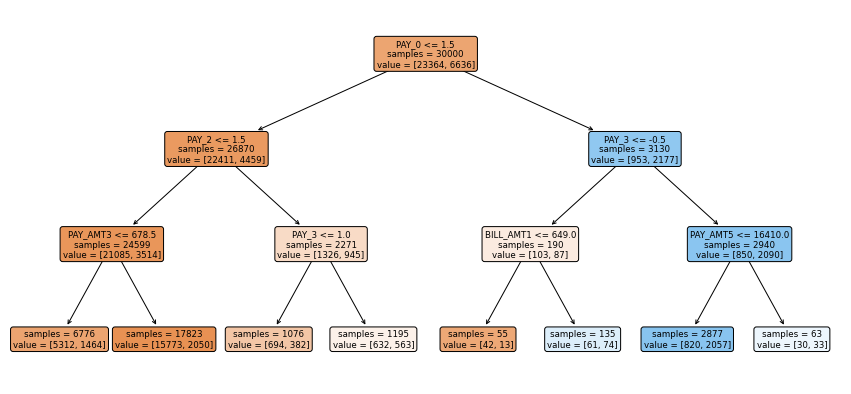

In [53]:
##Plotting the trees 
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(X,y)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text (DTree, feature_names = features))

In [54]:
CREDIT_CARD_LOANS1['default_payment'].value_counts()

0    23364
1     6636
Name: default_payment, dtype: int64

# Feature Engineering

In [15]:

CREDIT_CARD_LOANS1.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month', 'default_payment'],
      dtype=object)

In [11]:
pred_cols=CREDIT_CARD_LOANS1.columns.values[3:]
print(pred_cols)

['EDUCATION' 'MARRIAGE' 'AGE' 'PAY_0' 'PAY_2' 'PAY_3' 'PAY_4' 'PAY_5'
 'PAY_6' 'BILL_AMT1' 'BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4' 'BILL_AMT5'
 'BILL_AMT6' 'PAY_AMT1' 'PAY_AMT2' 'PAY_AMT3' 'PAY_AMT4' 'PAY_AMT5'
 'PAY_AMT6' 'default.payment.next.month' 'default_payment']


In [17]:
X = CREDIT_CARD_LOANS1 [pred_cols]
y = CREDIT_CARD_LOANS1 ['default.payment.next.month']

from sklearn  import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y ,train_size=0.8, random_state=75)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(24000, 23)
(24000,)
(6000, 23)
(6000,)


# BASIC_MODEL

since 1D is a classification problem, so linearRegression will not work.

In [13]:
# from  sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [15]:
from  sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

# RSquared and MAPE

In [16]:
#Rsquared value on train and test data
from sklearn import metrics
y_pred_train=model1.predict(X_train)
print("Train RSquared", metrics.r2_score(y_train,y_pred_train))

y_pred_test=model1.predict(X_test)
print("Test RSquared",metrics.r2_score(y_test,y_pred_test))

import numpy as np
#MAPE
print("MAPE on Train data : ", round(np.mean(np.abs(y_train - y_pred_train)/y_train),2))
print("MAPE on Test data : ", round(np.mean(np.abs(y_test - y_pred_test)/y_test),2))

#Since DEfault or Non Default is a classification Problem, Linear Regression, Rsquared & MAPE will not work.

Train RSquared 1.0
Test RSquared 1.0
MAPE on Train data :  inf
MAPE on Test data :  inf


# Handling Date variables

In [55]:
CREDIT_CARD_LOANS1.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month', 'default_payment'],
      dtype=object)

In [59]:
CREDIT_CARD_LOANS1.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
default_payment                 int64
dtype: objec

In [ ]:
date_vars = ['PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
CREDIT_CARD_LOANS1_REPAMENT=CREDIT_CARD_LOANS1[date_vars]
CREDIT_CARD_LOANS1_REPAMENT.head()

In [ ]:
# One hot encoding

In [69]:
categorical_cols=['SEX', 'EDUCATION', 'MARRIAGE']
for col in categorical_cols:
  print(CREDIT_CARD_LOANS1[col].value_counts())

# get dummy variables
one_hot_data = pd.get_dummies(CREDIT_CARD_LOANS1['SEX'])
#Try all ['SEX', 'EDUCATION', 'MARRIAGE']
print("one_hot_data \n", one_hot_data.sample(10))

# Concatenate dummy columns with main dataframe
CREDIT_CARD_LOANS1_dummy = pd.concat([CREDIT_CARD_LOANS1, one_hot_data],axis=1)
CREDIT_CARD_LOANS1_dummy.head()

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
one_hot_data 
        1  2
10485  0  1
21638  0  1
25435  0  1
6738   1  0
24906  1  0
29124  0  1
12438  0  1
25516  0  1
6328   1  0
28339  0  1


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,default_payment,1,2
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,1
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,1
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0
